In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('resnet18_eval.csv')
data.head()

,test,batch,image size,epoch,+ accuracy,- accuracy,avg accuracy,resize,contract reduce,model weights
0,learning_test,4,7,10,0.9374,1.0000,0.96870,0.5,1-20,resnet18_is7_bs4_e10_i10000_resize0.5_contrast...
1,part_whole_test,4,7,10,0.9405,0.9988,0.96965,0.5,1-20,resnet18_is7_bs4_e10_i10000_resize0.5_contrast...
2,global_test,4,7,10,0.8735,0.9926,0.93305,0.5,1-20,resnet18_is7_bs4_e10_i10000_resize0.5_contrast...
3,composite_test,4,7,10,0.6003,0.9986,0.79945,0.5,1-20,resnet18_is7_bs4_e10_i10000_resize0.5_contrast...
4,part_whole_flip_test,4,7,10,0.8991,0.9996,0.94935,0.5,1-20,resnet18_is7_bs4_e10_i10000_resize0.5_contrast...


In [19]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [25]:
test_list = data['test'].unique().tolist()
image_size_list = data['image size'].unique().tolist()
contract_reduce_list = data['contract reduce'].unique().tolist()

print(test_list)
print(image_size_list)
print(contract_reduce_list)

['learning_test', 'part_whole_test', 'global_test', 'composite_test', 'part_whole_flip_test']
[7, 14, 28, 56, 112, 224, 336, 448]
['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '181-200']


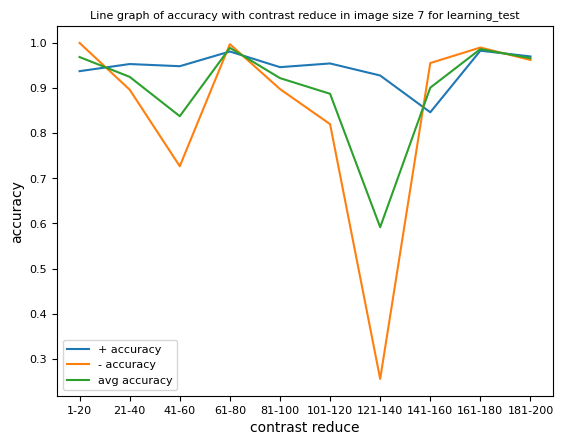

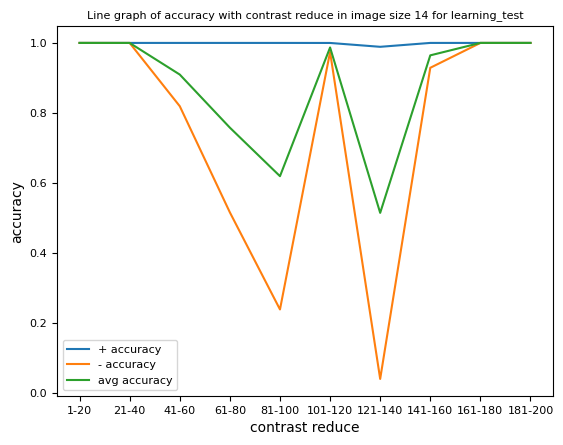

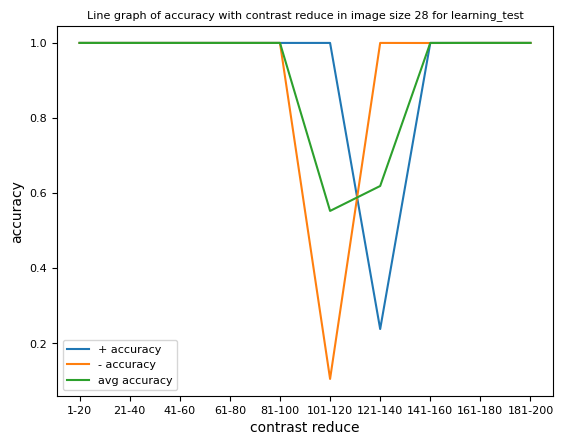

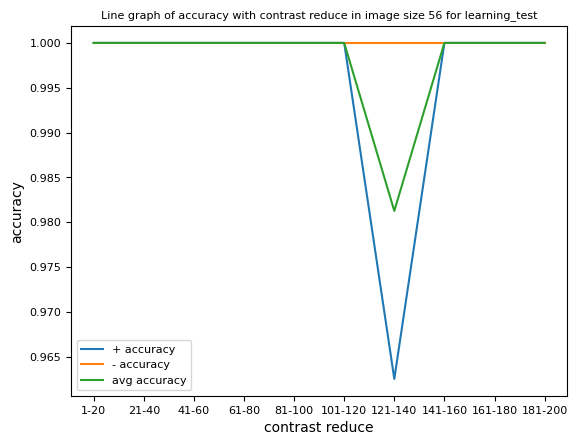

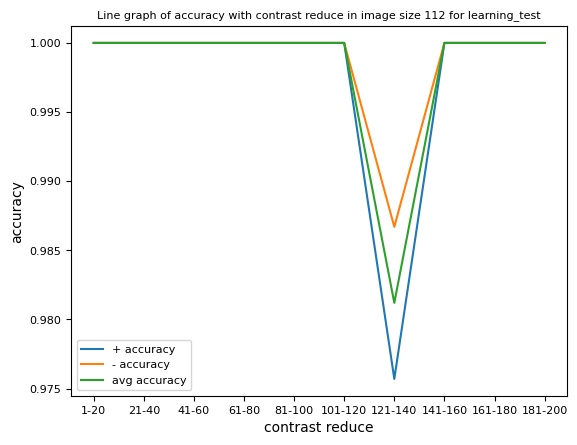

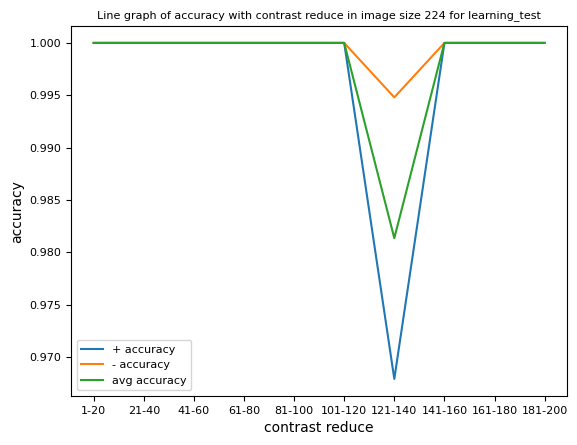

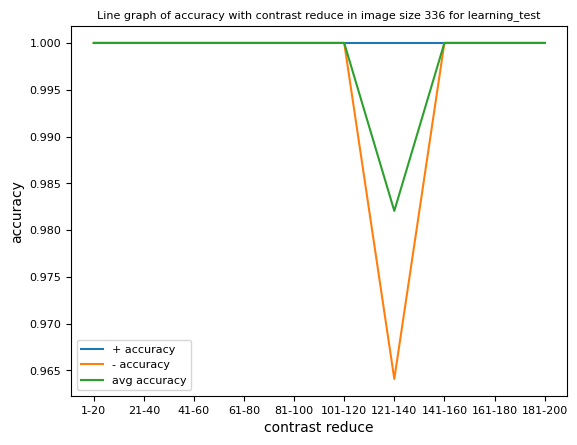

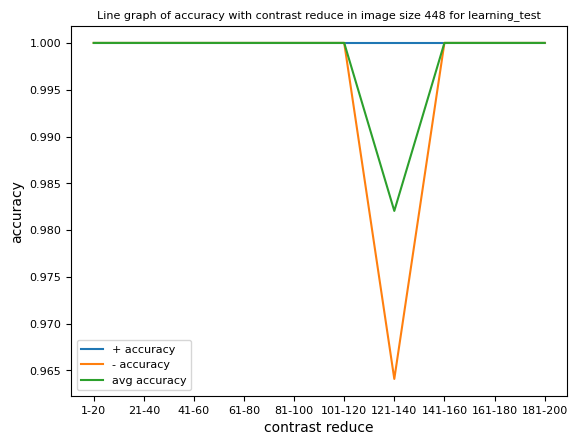

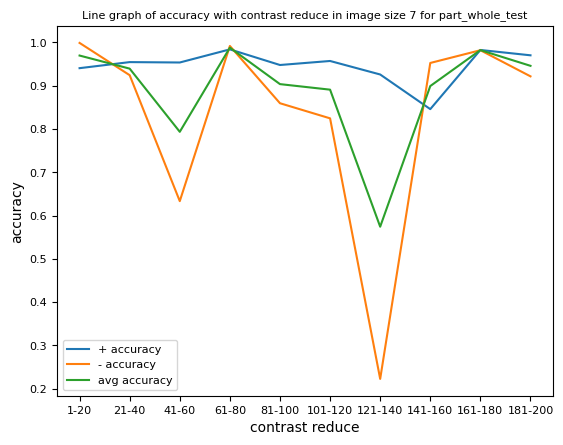

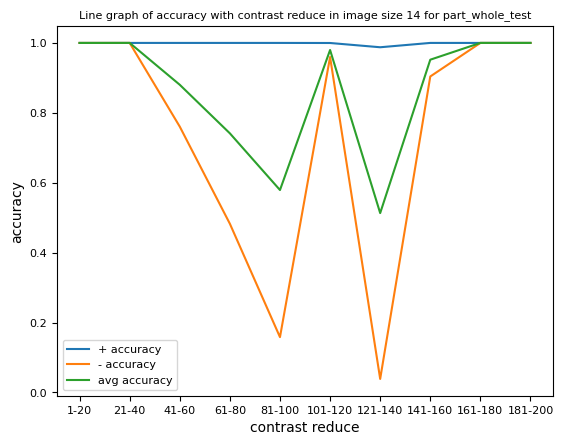

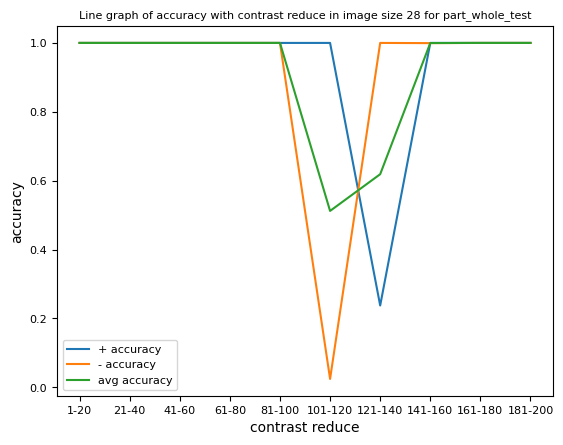

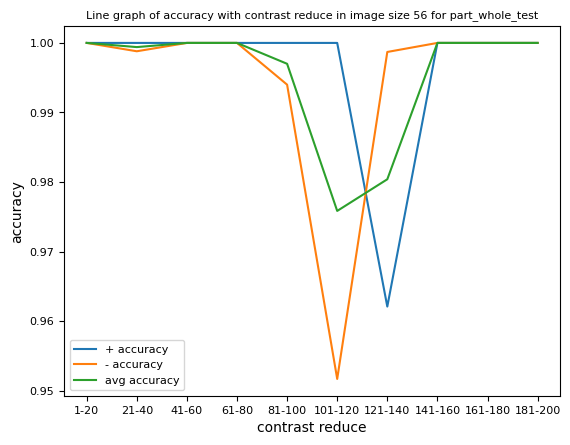

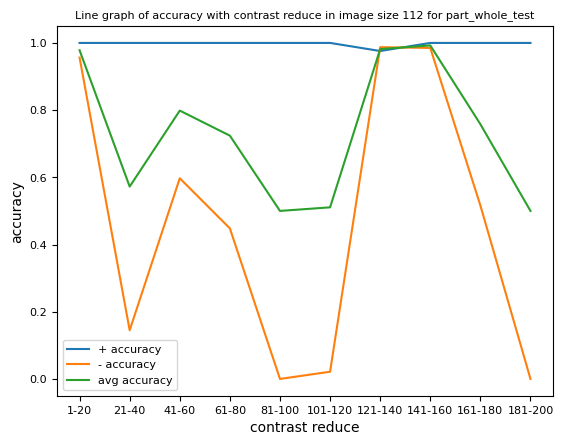

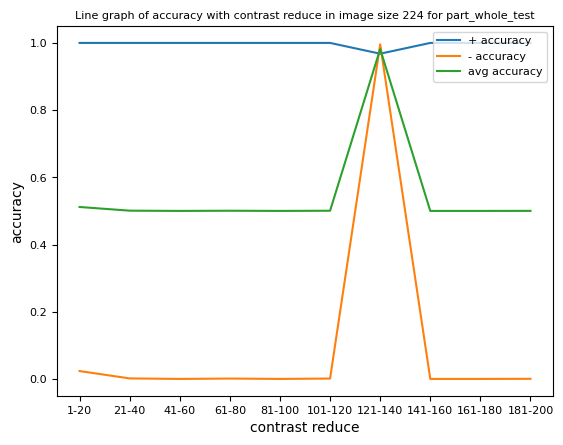

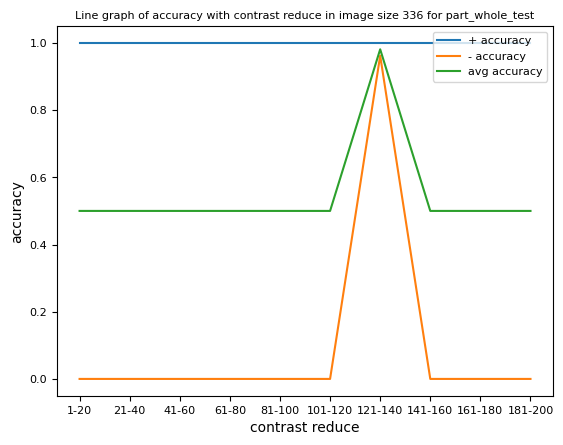

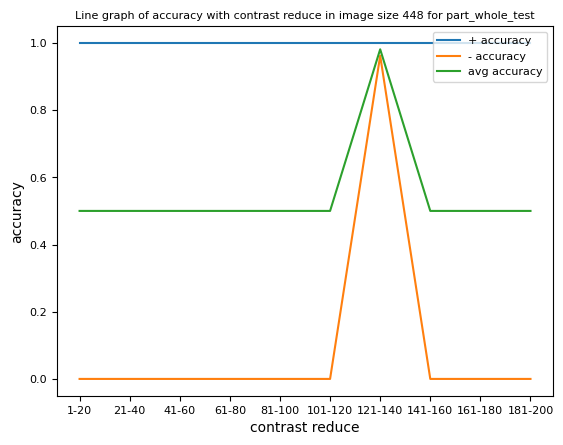

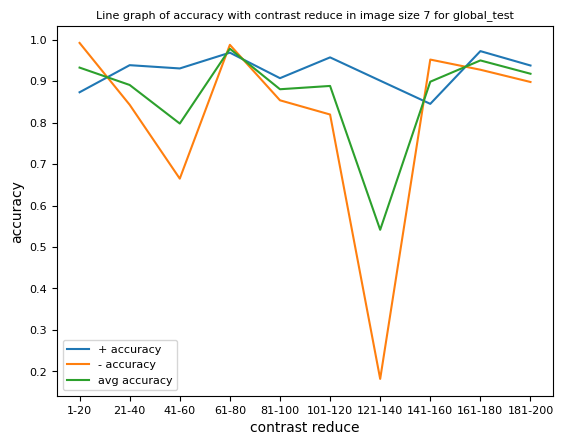

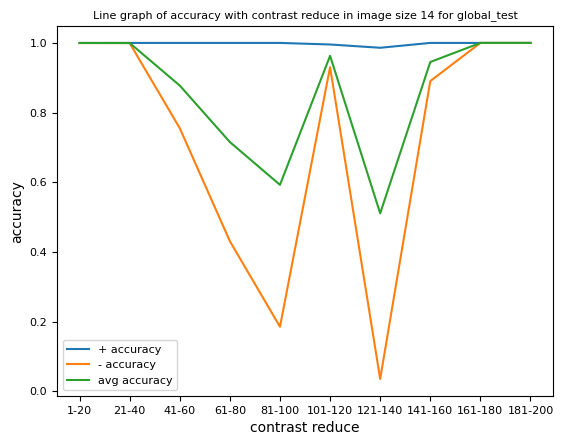

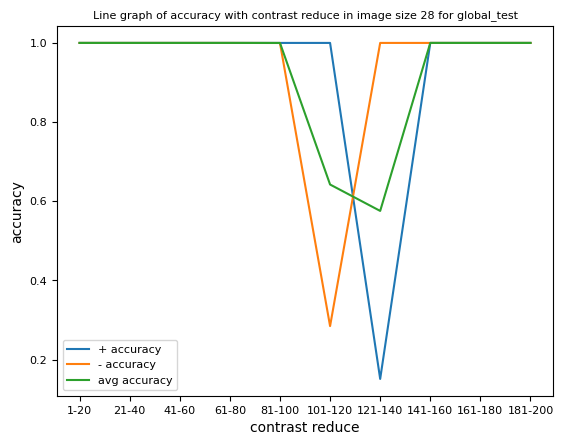

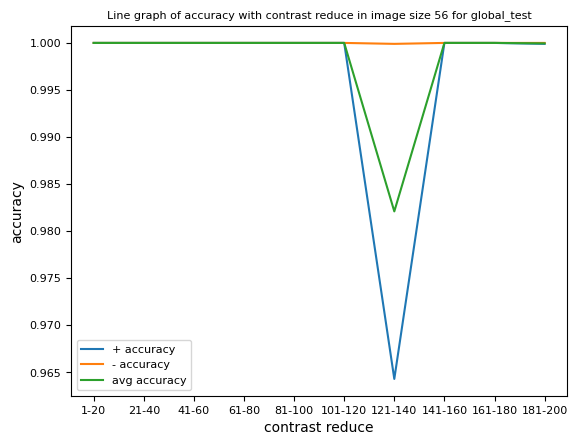

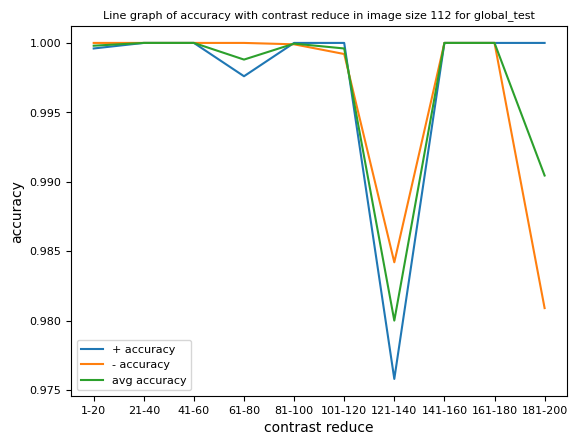

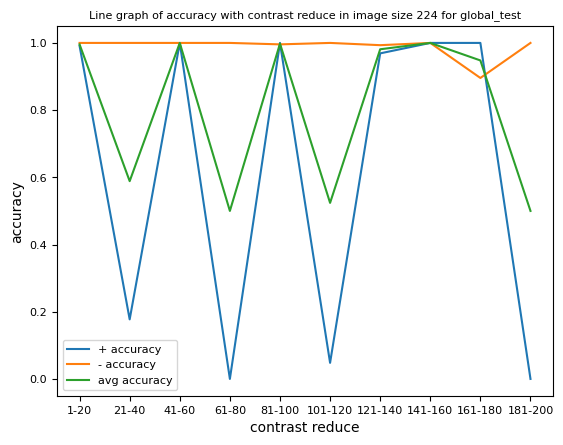

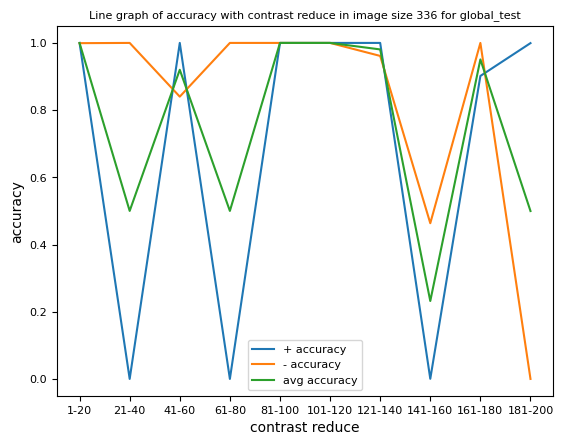

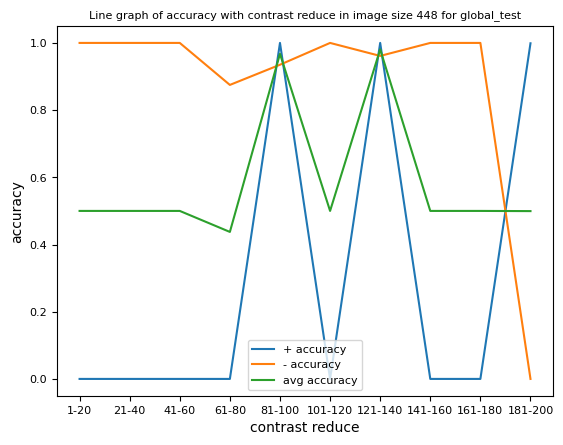

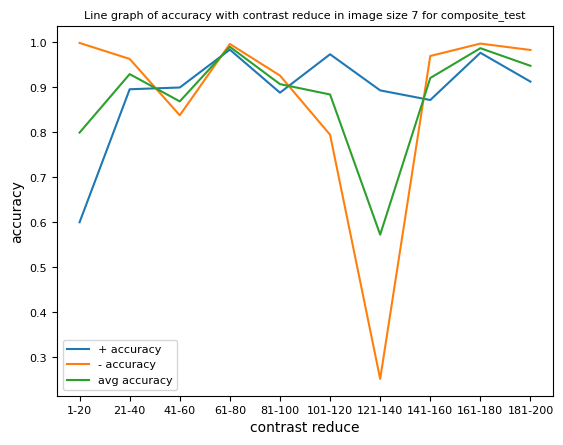

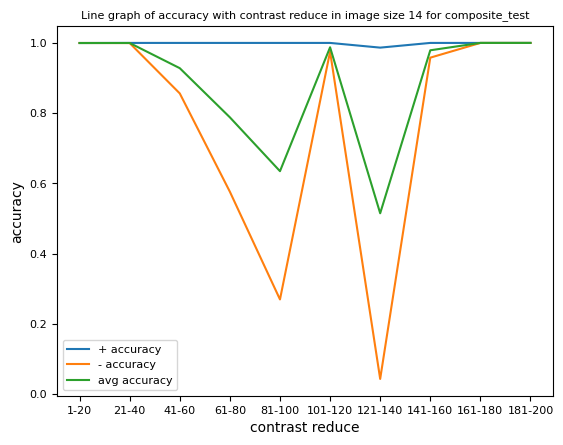

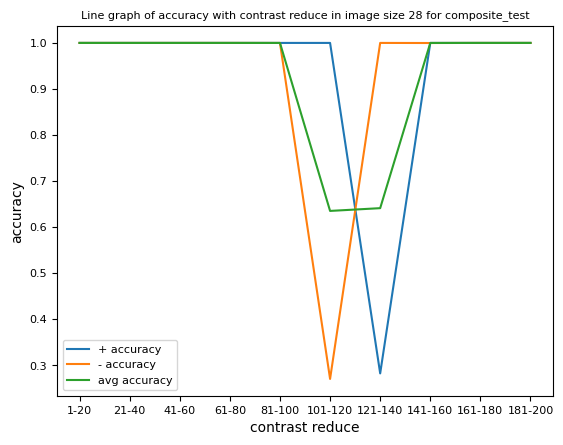

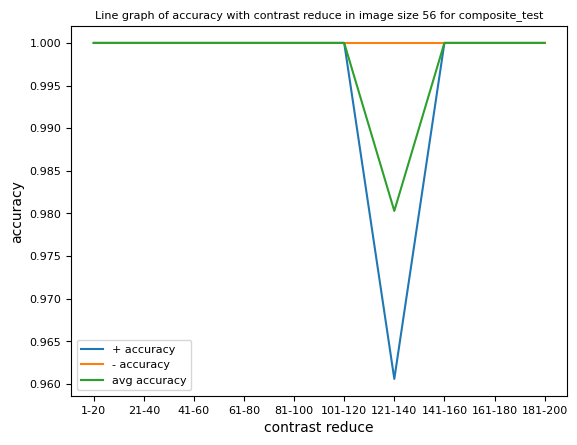

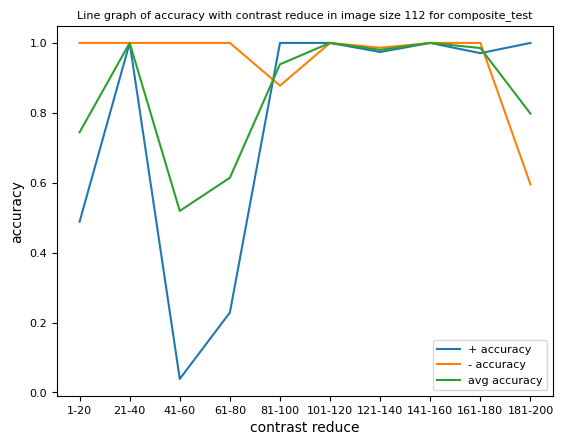

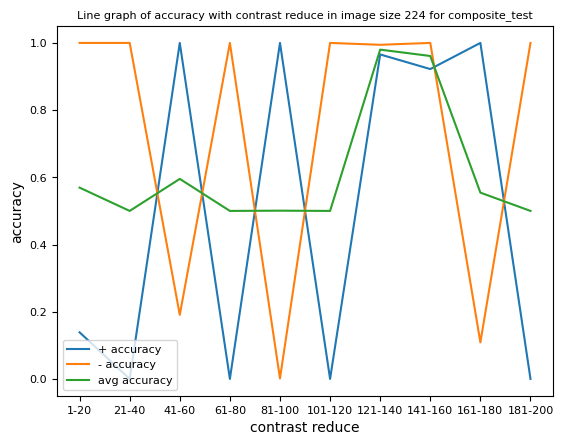

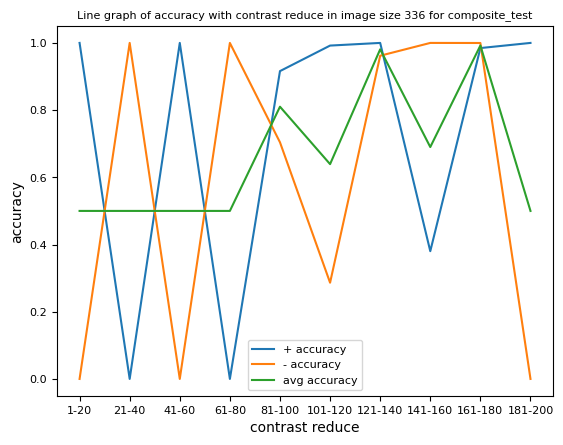

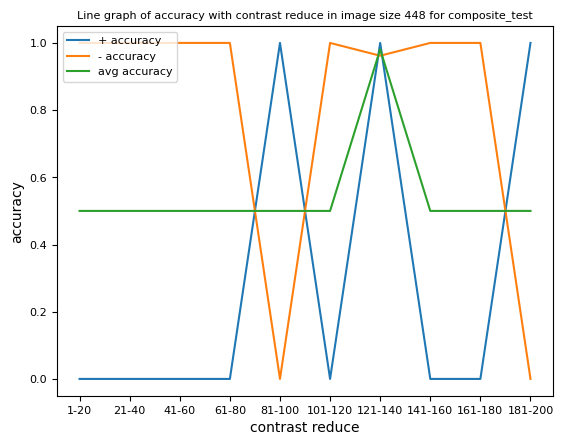

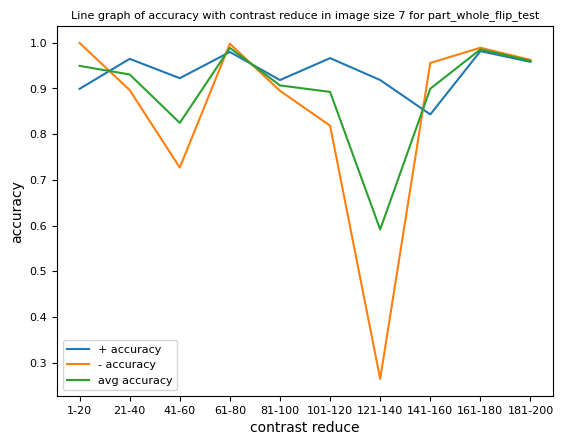

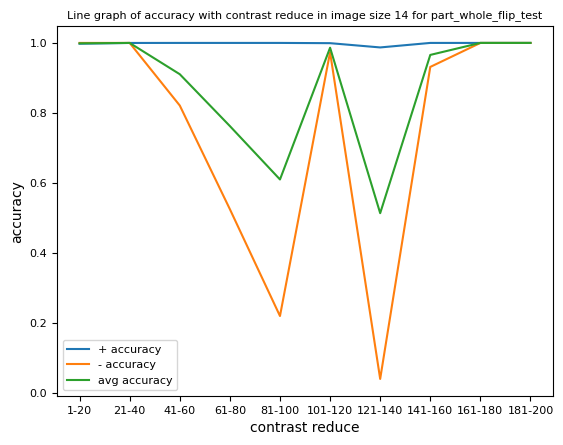

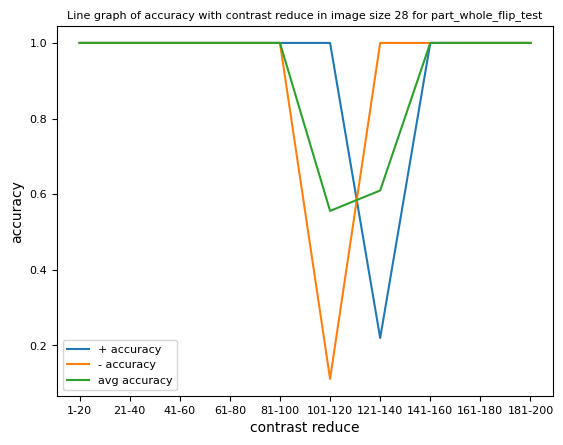

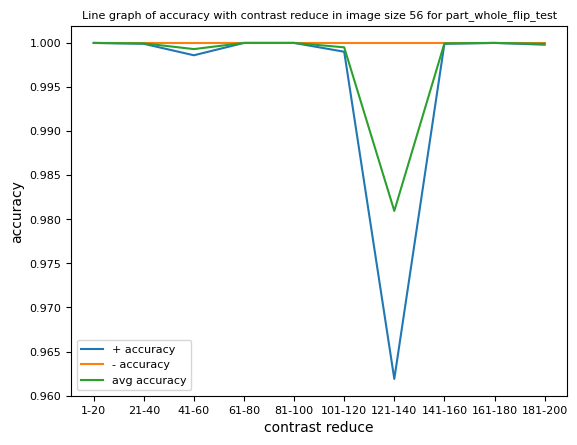

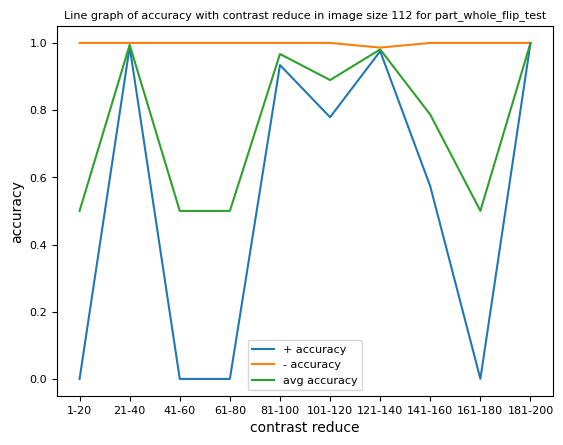

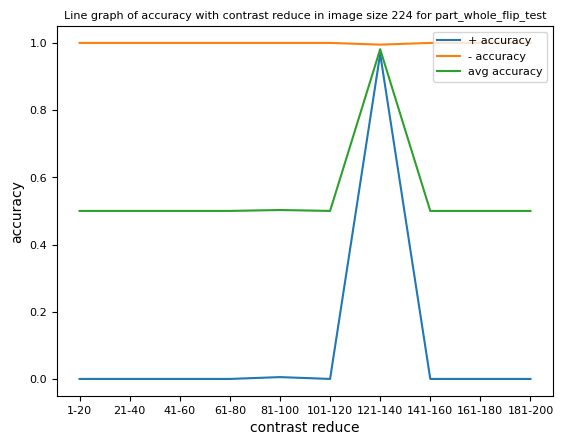

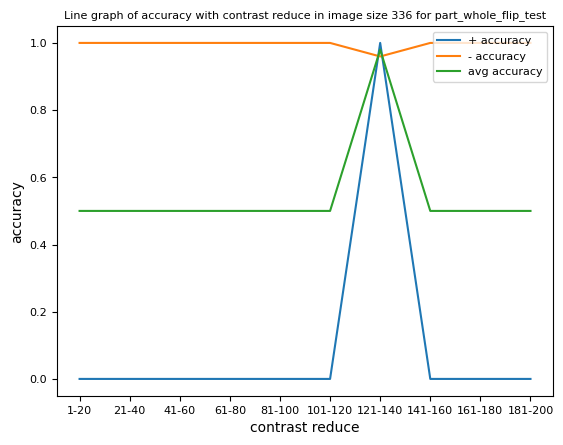

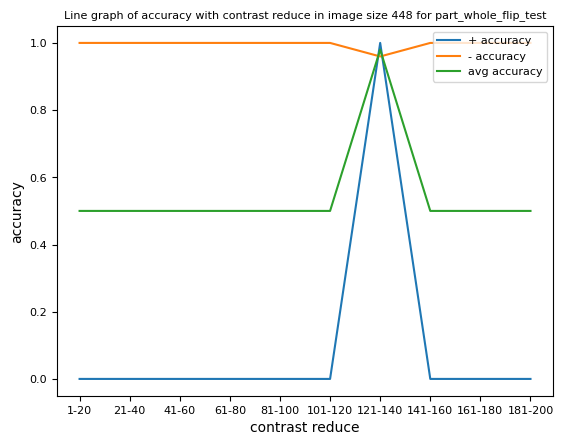

In [33]:
for test in test_list:
    for image_size in image_size_list:
        test_image_size_data = data[(data.test == test) & (data['image size'] == image_size)]
        # plt.plot(test_image_size_data['contract reduce'], test_image_size_data['+ accuracy'], label= f'image size = {image_size}')
        plt.plot(test_image_size_data['contract reduce'], test_image_size_data['+ accuracy'], label= '+ accuracy')
        plt.plot(test_image_size_data['contract reduce'], test_image_size_data['- accuracy'], label= '- accuracy')
        plt.plot(test_image_size_data['contract reduce'], test_image_size_data['avg accuracy'], label= 'avg accuracy')
        plt.xlabel('contrast reduce') 
        plt.ylabel('accuracy') 
        plt.title(f"Line graph of accuracy with contrast reduce in image size {image_size} for {test}")
        plt.legend()
        plt.show()

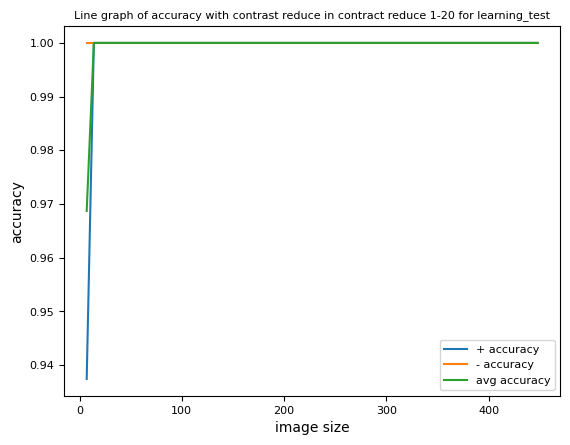

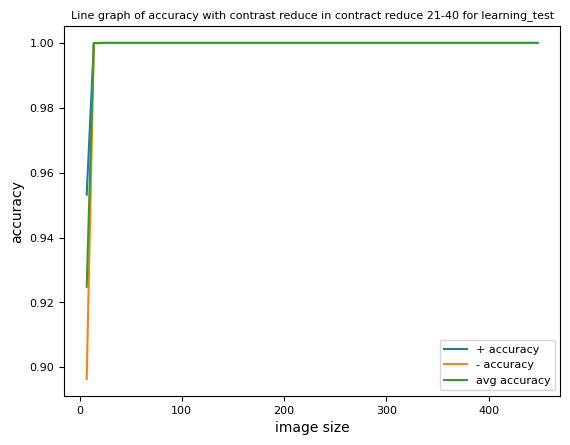

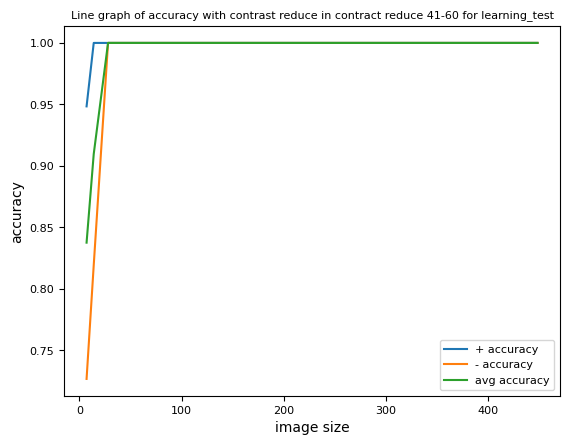

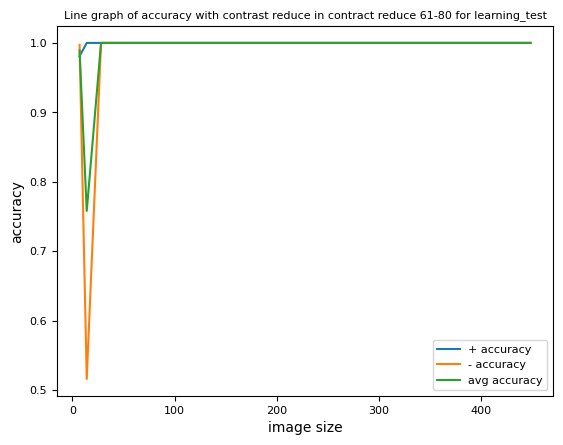

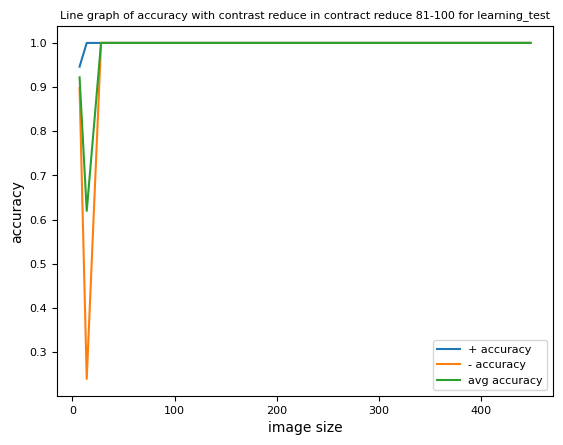

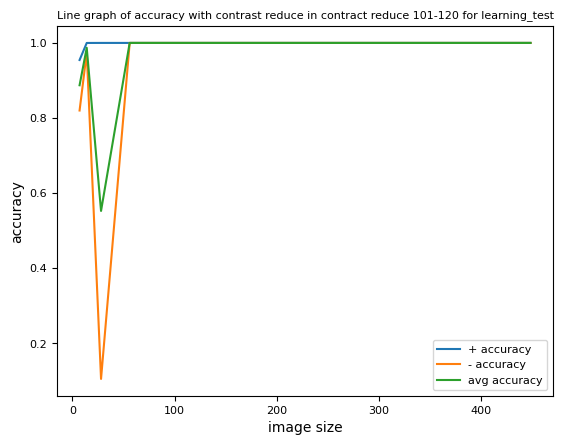

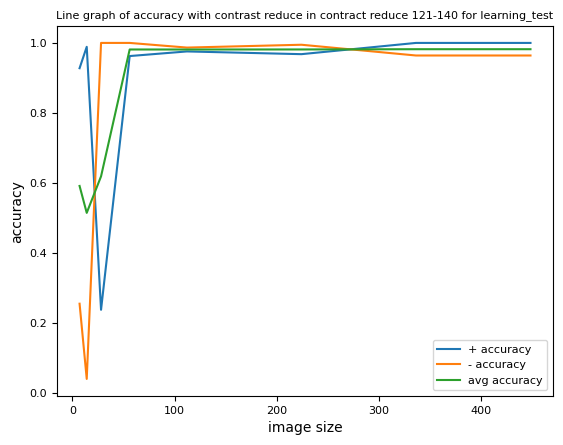

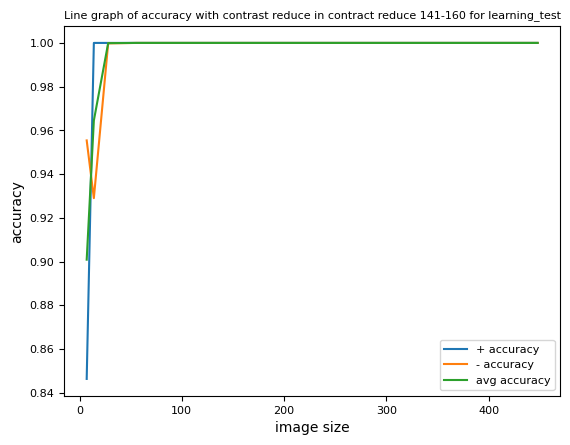

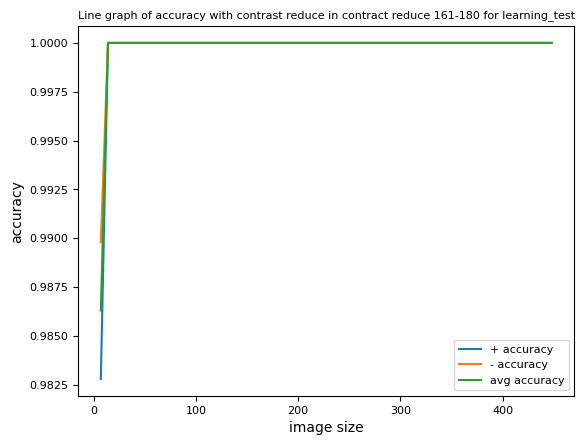

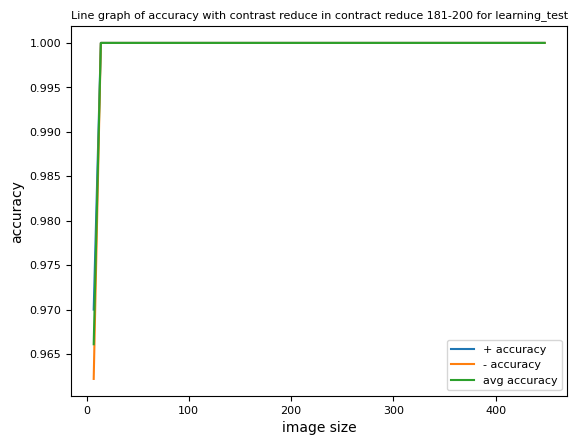

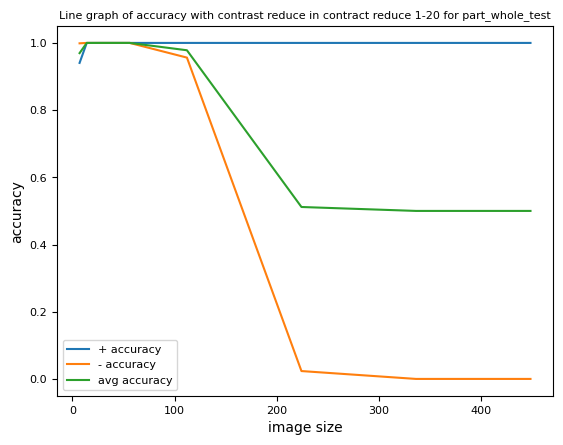

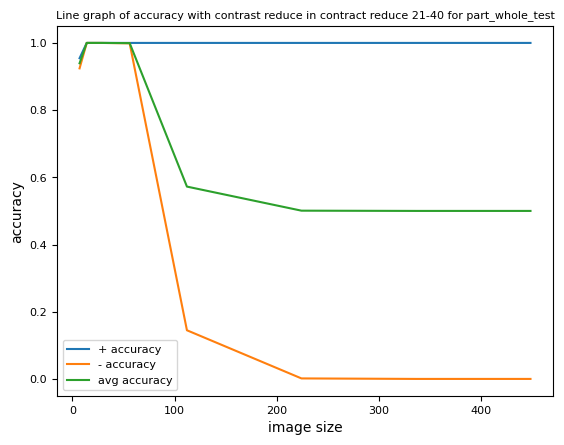

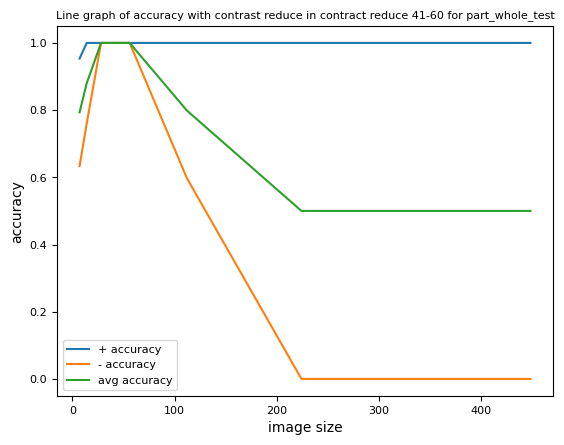

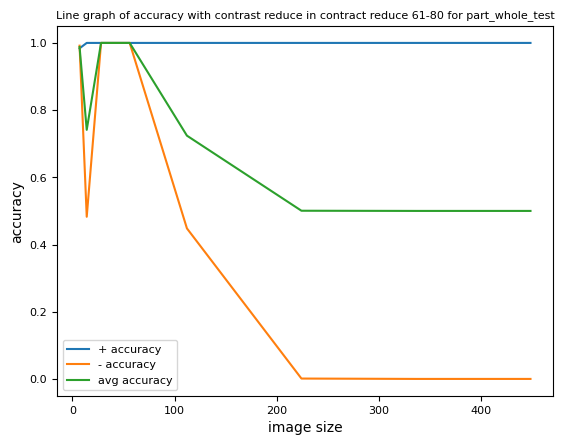

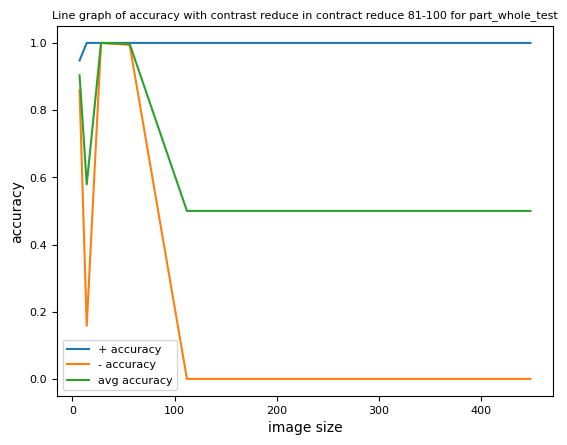

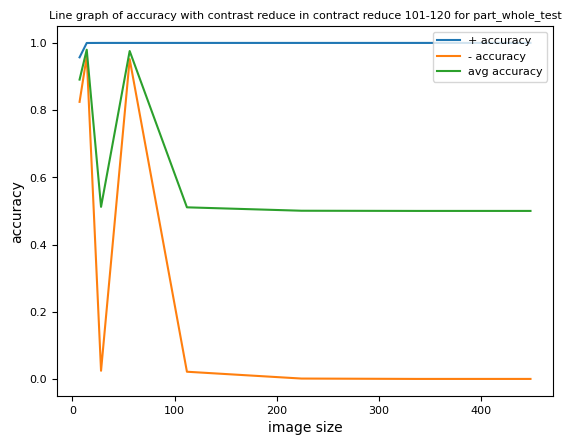

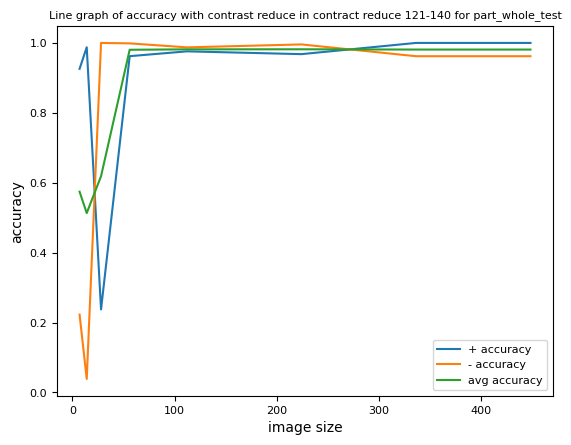

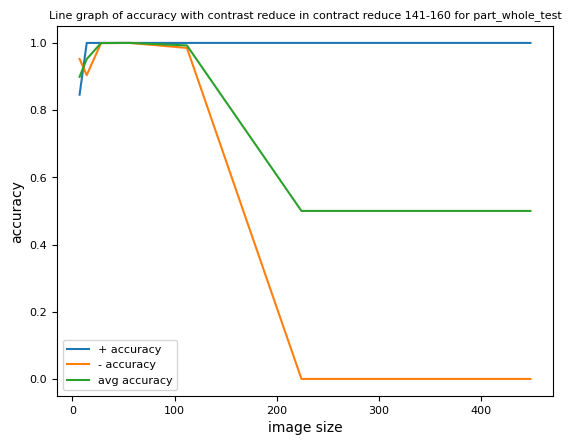

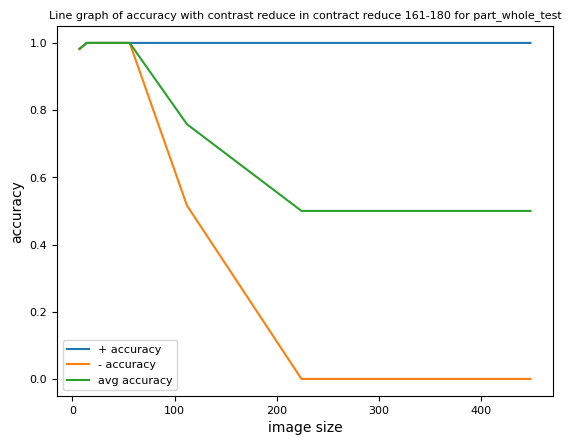

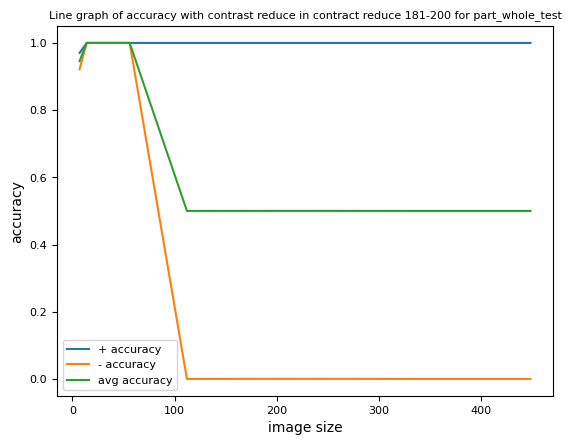

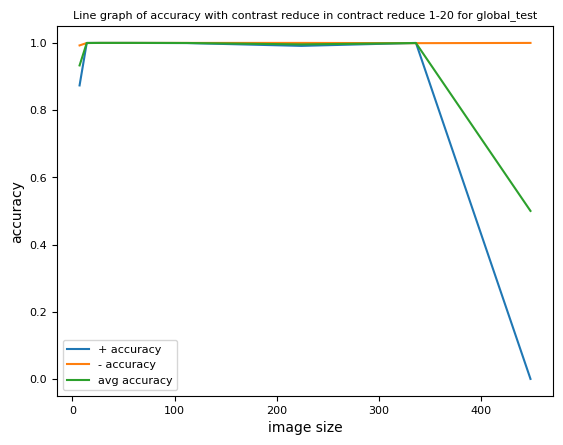

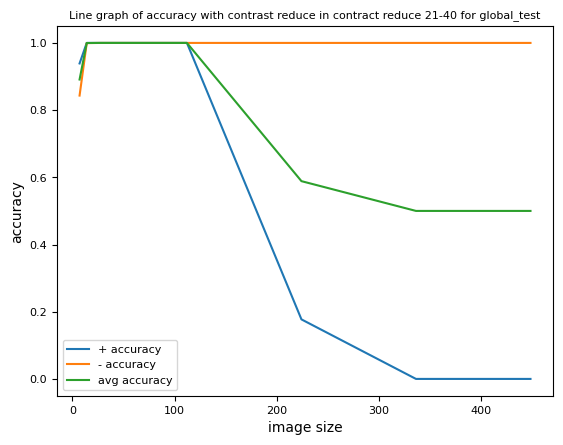

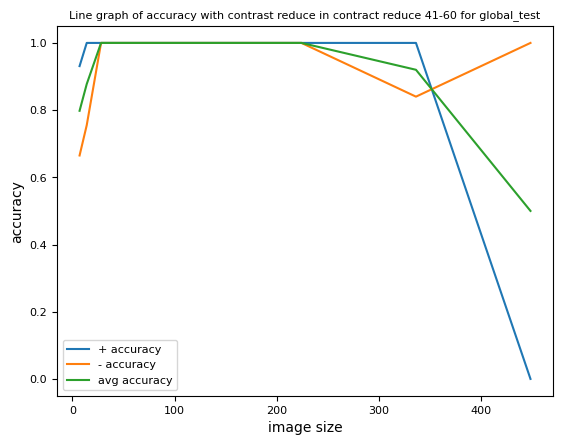

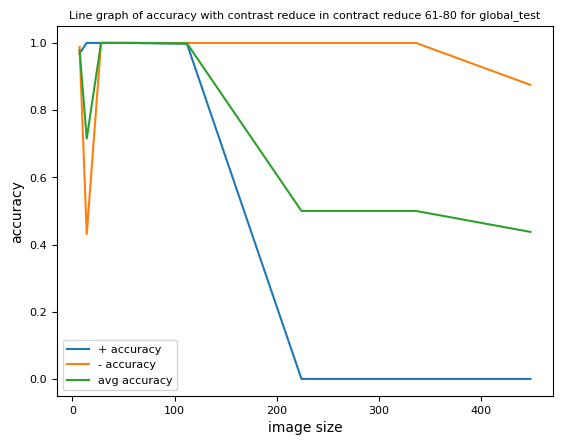

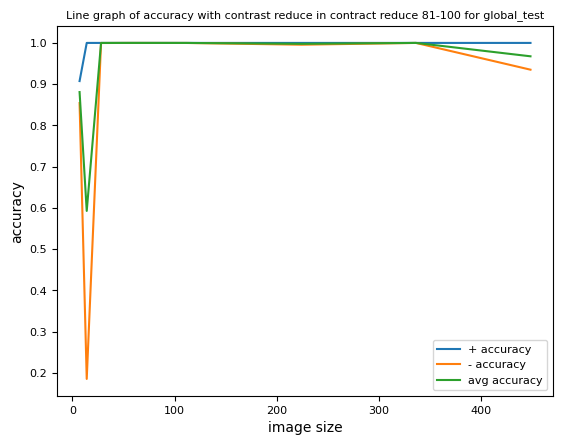

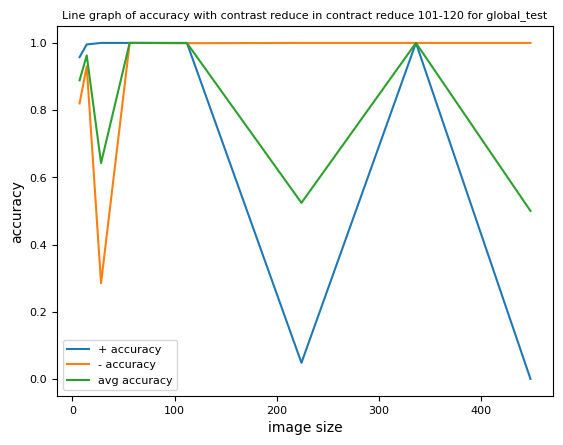

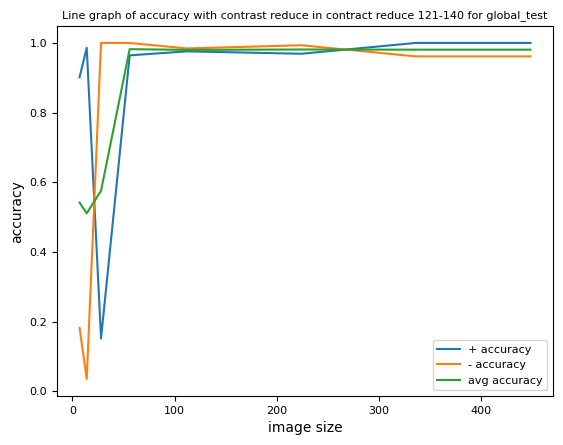

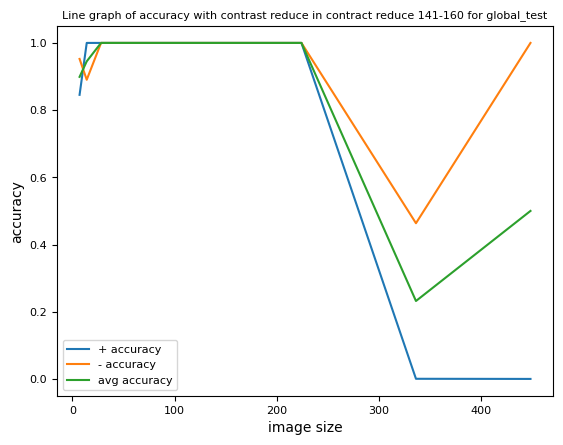

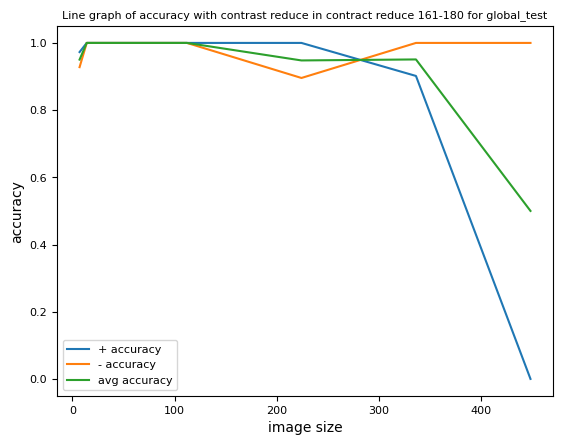

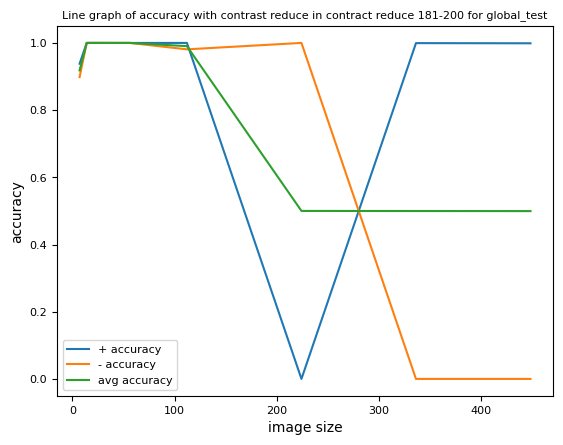

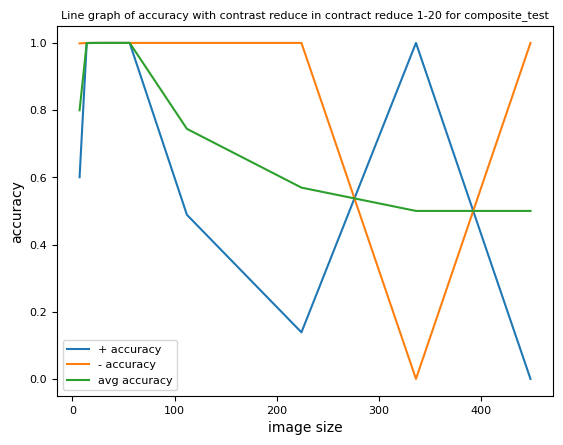

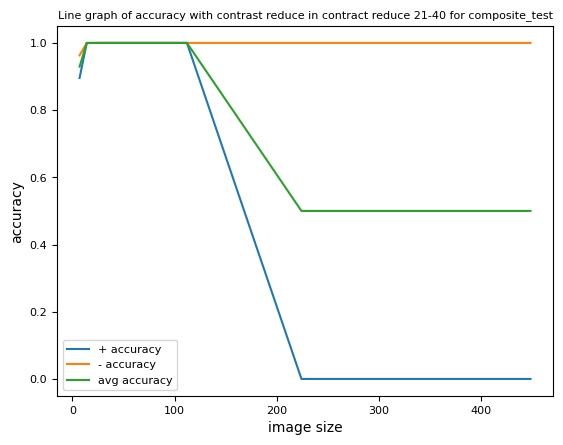

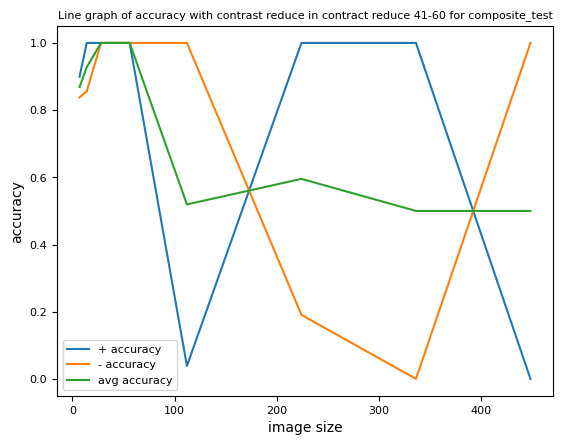

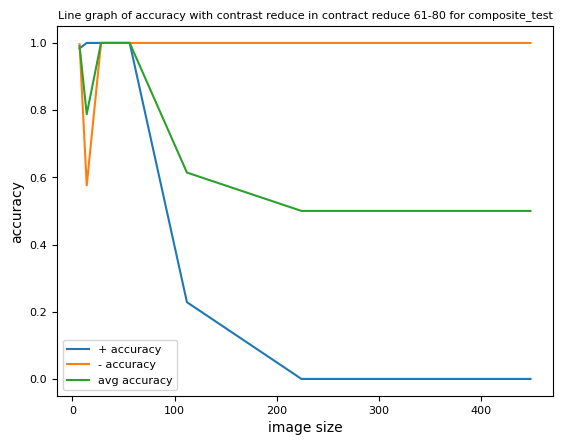

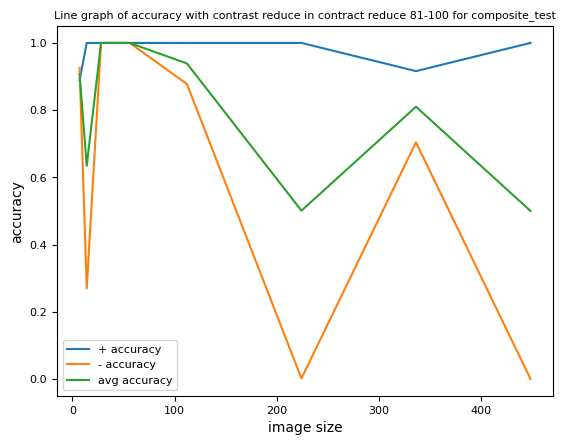

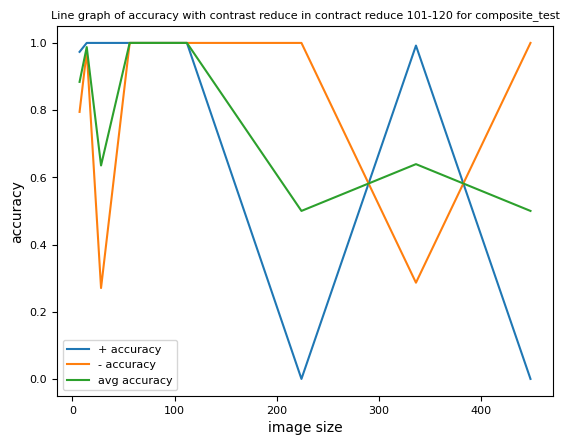

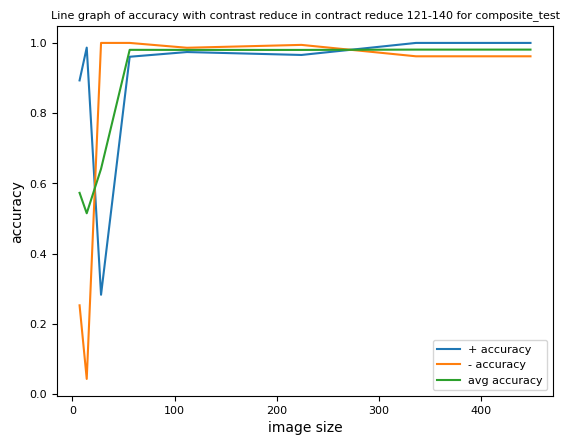

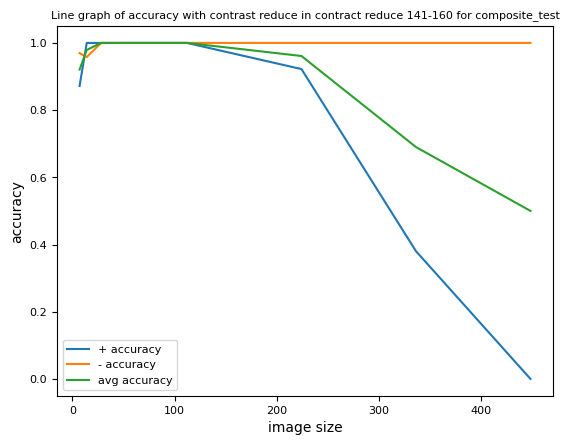

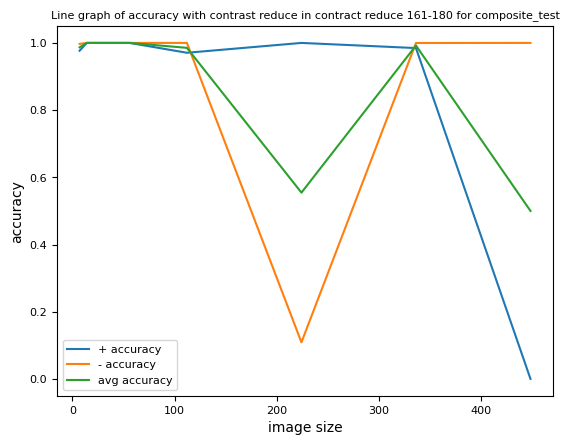

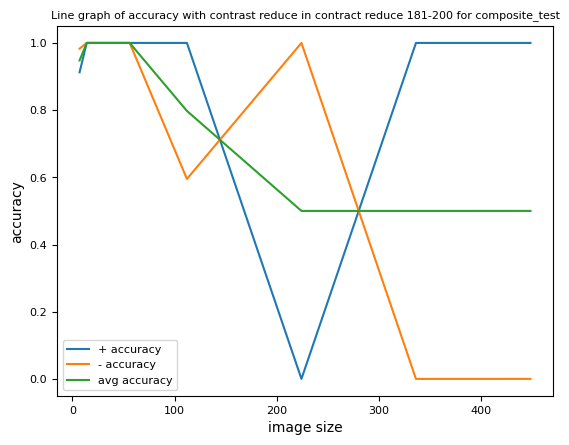

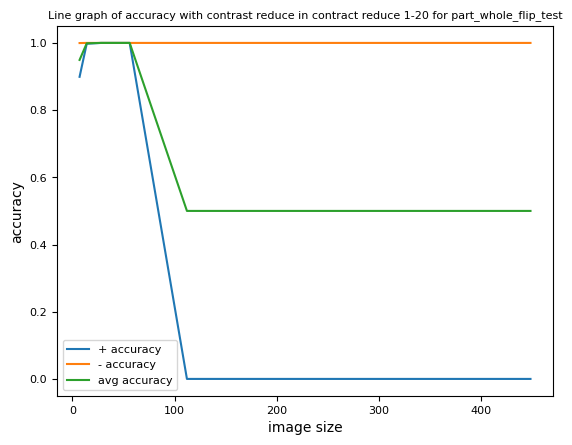

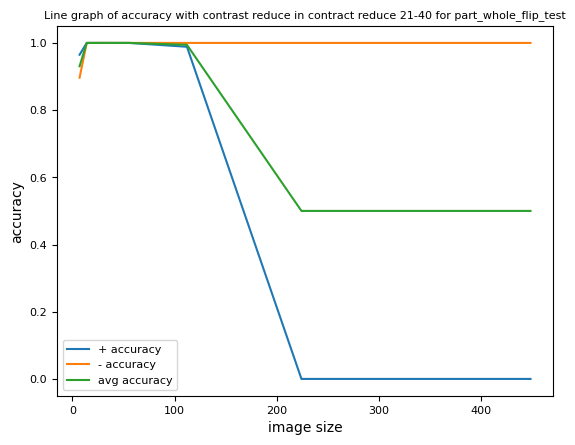

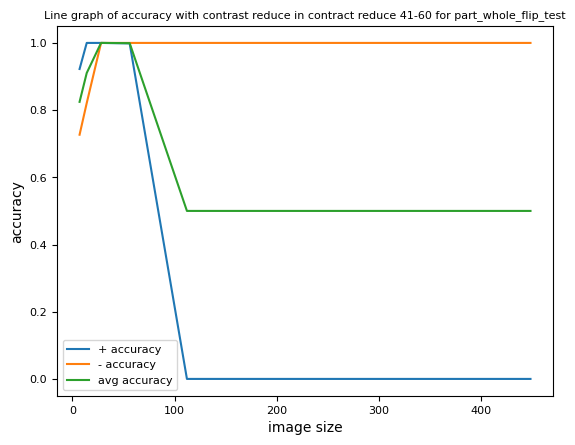

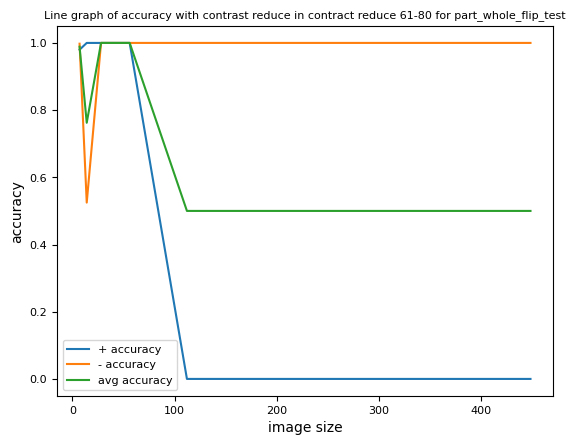

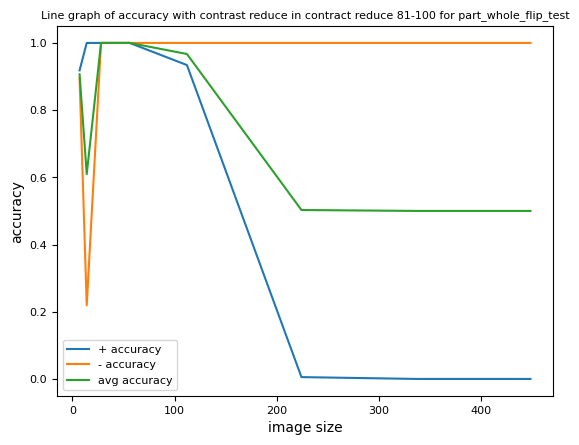

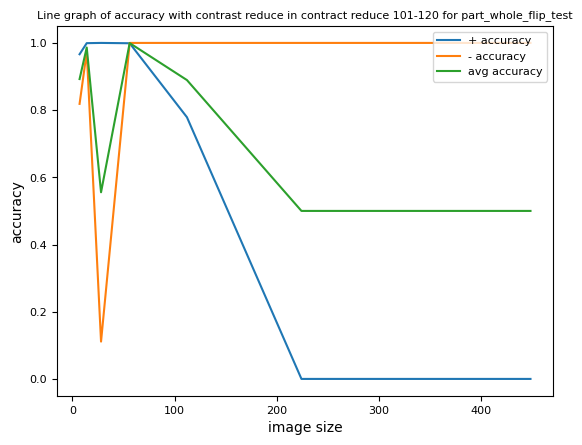

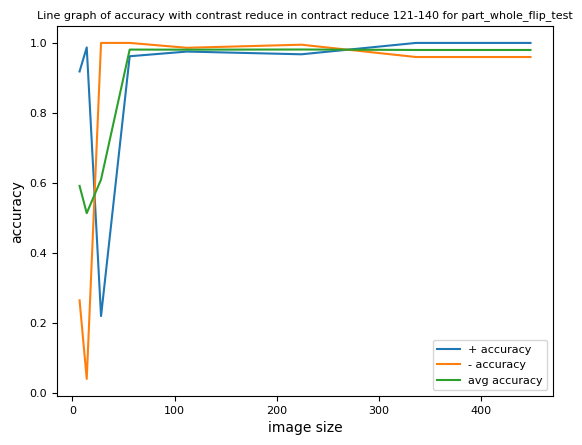

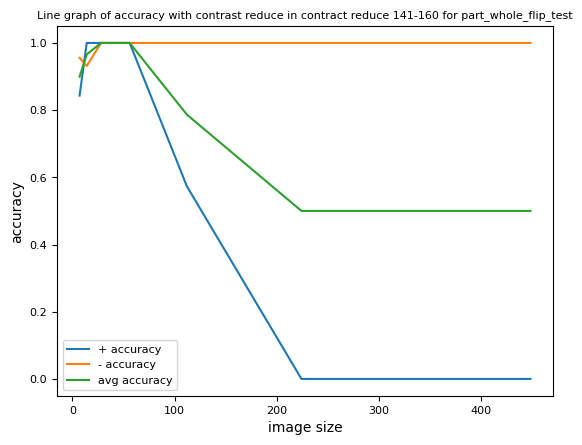

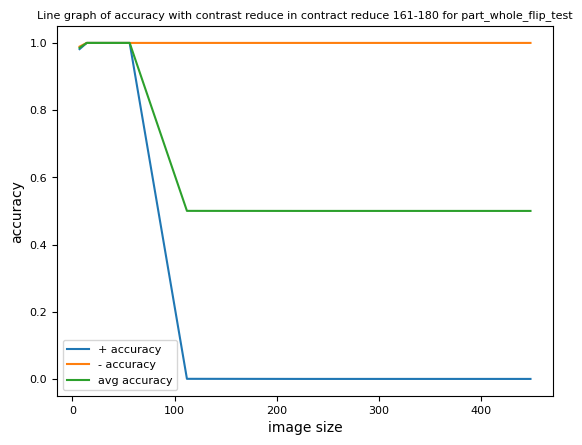

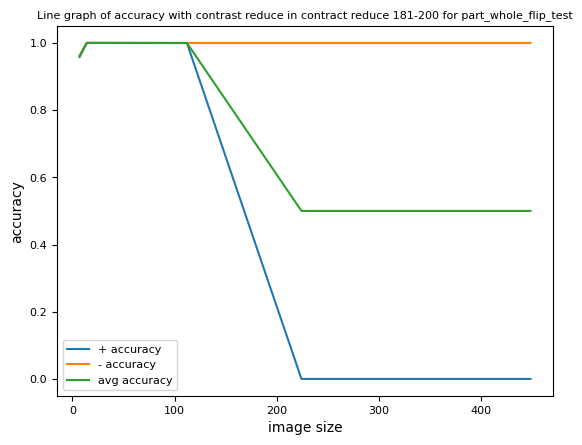

In [34]:
for test in test_list:
    for contract_reduce in contract_reduce_list:
        test_contract_reduce_data = data[(data.test == test) & (data['contract reduce'] == contract_reduce)]
        # plt.plot(test_image_size_data['contract reduce'], test_image_size_data['+ accuracy'], label= f'image size = {image_size}')
        plt.plot(test_contract_reduce_data['image size'], test_contract_reduce_data['+ accuracy'], label= '+ accuracy')
        plt.plot(test_contract_reduce_data['image size'], test_contract_reduce_data['- accuracy'], label= '- accuracy')
        plt.plot(test_contract_reduce_data['image size'], test_contract_reduce_data['avg accuracy'], label= 'avg accuracy')
        plt.xlabel('image size') 
        plt.ylabel('accuracy') 
        plt.title(f"Line graph of accuracy with contrast reduce in contract reduce {contract_reduce} for {test}")
        plt.legend()
        plt.show()

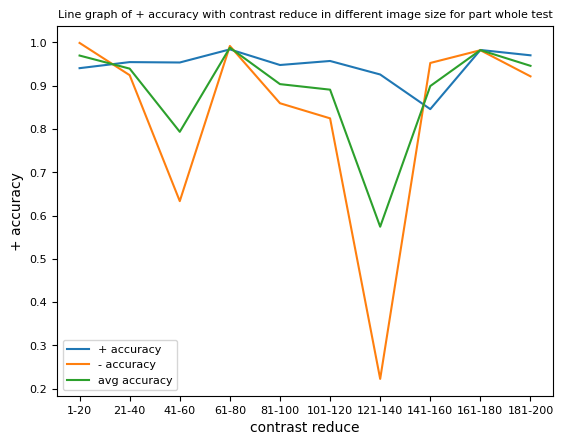

In [30]:
part_whole_test_is_7 = data[(data.test == 'part_whole_test') & (data['image size'] == 7)]
part_whole_test_is_14 = data[(data.test == 'part_whole_test') & (data['image size'] == 14)]
plt.plot(part_whole_test_is_7['contract reduce'], part_whole_test_is_7['+ accuracy'], label= '+ accuracy')
plt.plot(part_whole_test_is_7['contract reduce'], part_whole_test_is_7['- accuracy'], label= '- accuracy')
plt.plot(part_whole_test_is_7['contract reduce'], part_whole_test_is_7['avg accuracy'], label= 'avg accuracy')
# plt.plot(part_whole_test_is_14['contract reduce'], part_whole_test_is_14['+ accuracy'], label= 'image size = 14')
plt.xlabel('contrast reduce') 
plt.ylabel('+ accuracy') 
  
# displaying the title
plt.title("Line graph of + accuracy with contrast reduce in different image size for part whole test")
plt.legend()